raw_data= pd.read_csv("raw_data_ratio.csv", encoding='cp949')

In [4]:
raw_data= pd.read_csv("raw_data_ratio.csv", encoding='cp949')

In [3]:
%cd ..

C:\Users\chibok


In [5]:
raw_data.head()

,code,gu,dong,older,disableratio,fireratio,bankratio,seniorcenterratio,movinginratio,movingoutratio
0,종로구사직동,종로구,사직동,378,0.034170,0.001527,0.002291,0.000191,0.172855,0.188890
1,종로구삼청동,종로구,삼청동,175,0.038450,0.002296,0.000861,0.000574,0.129699,0.157245
2,종로구부암동,종로구,부암동,314,0.031974,0.000958,0.000174,0.000349,0.149329,0.159174
3,종로구평창동,종로구,평창동,486,0.030834,0.001110,0.000252,0.000252,0.127927,0.135497
4,종로구무악동,종로구,무악동,238,0.037916,0.000465,0.000116,0.000465,0.140265,0.145848


In [6]:
from sklearn.preprocessing import scale
dfX = pd.DataFrame(raw_data, columns = ["disableratio", "fireratio", "bankratio", "seniorcenterratio", "movinginratio", "movingoutratio"])
dfX_scale = pd.DataFrame(scale(dfX), columns=["disableratio","fireratio", "bankratio", "seniorcenterratio", "movinginratio", "movingoutratio"])

In [7]:
dfX_scale.head()

,disableratio,fireratio,bankratio,seniorcenterratio,movinginratio,movingoutratio
0,-0.429131,0.907138,1.088322,-0.953964,0.573032,0.320091
1,-0.099454,1.718458,0.261183,1.297974,-0.558123,-0.095443
2,-0.598260,0.306567,-0.135987,-0.027318,-0.043592,-0.070115
3,-0.686102,0.466846,-0.090809,-0.592948,-0.604564,-0.381031
4,-0.140636,-0.214182,-0.169480,0.658847,-0.281167,-0.245105


C:\Users\chibok\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


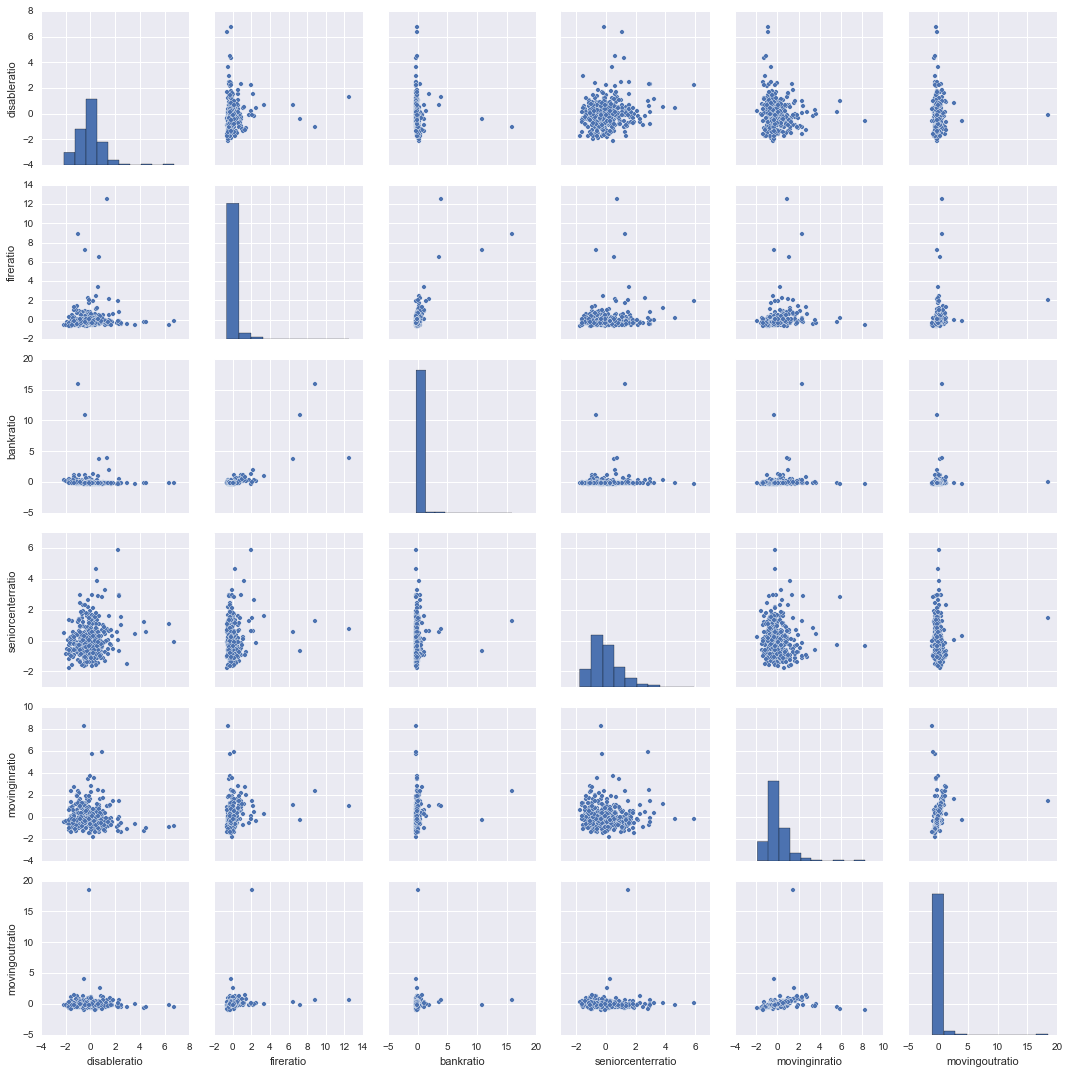

In [8]:
sns.pairplot(dfX_scale)

In [9]:
dfy = pd.DataFrame(raw_data, columns = ['older'])

In [10]:
dfy.tail()

,older
418,665
419,453
420,821
421,186
422,508


In [11]:
data = pd.concat([dfX_scale, dfy], axis=1)

In [12]:
data.head()

,disableratio,fireratio,bankratio,seniorcenterratio,movinginratio,movingoutratio,older
0,-0.429131,0.907138,1.088322,-0.953964,0.573032,0.320091,378
1,-0.099454,1.718458,0.261183,1.297974,-0.558123,-0.095443,175
2,-0.598260,0.306567,-0.135987,-0.027318,-0.043592,-0.070115,314
3,-0.686102,0.466846,-0.090809,-0.592948,-0.604564,-0.381031,486
4,-0.140636,-0.214182,-0.169480,0.658847,-0.281167,-0.245105,238


In [13]:
from sklearn.preprocessing import normalize 
dfX_scale_norm = pd.DataFrame(normalize(dfX_scale), columns=dfX_scale.columns)
dfX_scale_norm.head()

,disableratio,fireratio,bankratio,seniorcenterratio,movinginratio,movingoutratio
0,-0.228327,0.482659,0.579061,-0.507574,0.304892,0.170310
1,-0.044315,0.765724,0.116380,0.578361,-0.248693,-0.042528
2,-0.865361,0.443437,-0.196700,-0.039514,-0.063055,-0.101419
3,-0.549463,0.373872,-0.072724,-0.474861,-0.484163,-0.305147
4,-0.172125,-0.262137,-0.207427,0.806363,-0.344121,-0.299984


In [14]:
finishing_data = pd.concat([dfX_scale_norm, dfy], axis=1)

In [15]:
finishing_data.head()

,disableratio,fireratio,bankratio,seniorcenterratio,movinginratio,movingoutratio,older
0,-0.228327,0.482659,0.579061,-0.507574,0.304892,0.170310,378
1,-0.044315,0.765724,0.116380,0.578361,-0.248693,-0.042528,175
2,-0.865361,0.443437,-0.196700,-0.039514,-0.063055,-0.101419,314
3,-0.549463,0.373872,-0.072724,-0.474861,-0.484163,-0.305147,486
4,-0.172125,-0.262137,-0.207427,0.806363,-0.344121,-0.299984,238


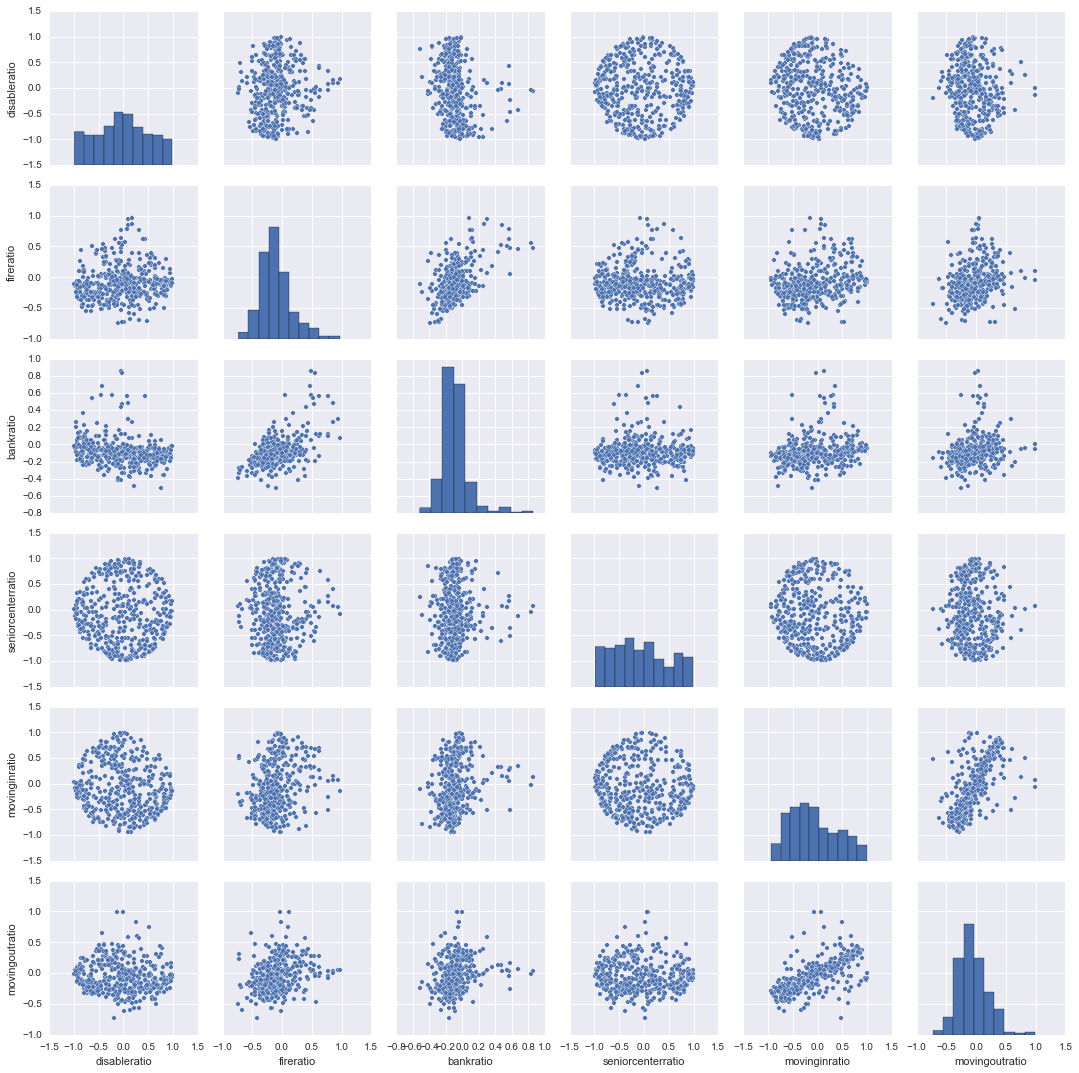

In [16]:
sns.pairplot(dfX_scale_norm)

In [17]:
import statsmodels.api as sm
project_data = sm.add_constant(finishing_data)
#project_data
model_data = sm.OLS(project_data.ix[:, -1], project_data.ix[:, :-1]) #log 후 scaling 처리 했을 때
result_data = model_data.fit()
print(result_data.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.110    
Dependent Variable:   older             AIC:                 6009.9305
Date:                 2016-02-25 00:32  BIC:                 6038.2621
No. Observations:     423               Log-Likelihood:      -2998.0  
Df Model:             6                 F-statistic:         9.673    
Df Residuals:         416               Prob (F-statistic):  5.61e-10 
R-squared:            0.122             Scale:               85271.   
----------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
----------------------------------------------------------------------
const              544.7515  16.3390 33.3405 0.0000  512.6342 576.8688
disableratio       151.9980  29.2713  5.1927 0.0000   94.4599 209.5361
fireratio          -30.2254  65.3737 -0.4623 0.6441 -158.7293  98.2785
bankratio          -53.75

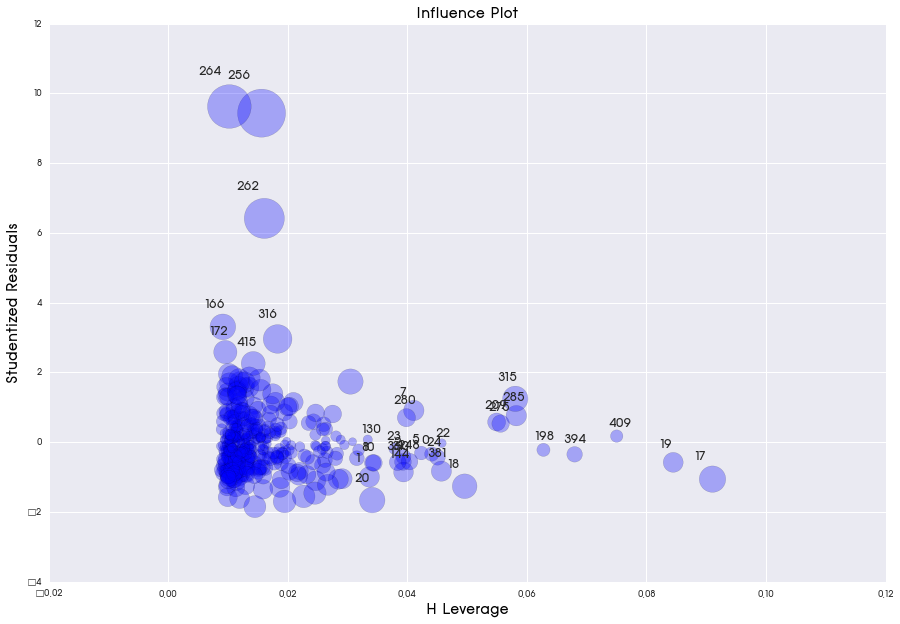

In [18]:
import matplotlib.font_manager
matplotlib.rc('font', family=u'HYnamB')
fig, ax = plt.subplots(figsize=(15, 10))
sm.graphics.influence_plot(result_data, plot_alpha=0.3, ax=ax, encoding='cp949');

In [19]:
idx_outlier = np.nonzero(result_data.outlier_test().ix[:, -1].abs() < 0.01)[0]
idx_outlier

array([256, 262, 264], dtype=int64)

In [20]:
dfX_drop = dfX_scale_norm.drop(idx_outlier)
#dfy_drop = dfy.drop(idx_outlier)
dfX_drop
dfy_drop = dfy.drop(idx_outlier)
dfy_drop.tail()

,older
418,665
419,453
420,821
421,186
422,508


In [21]:
data2 = pd.concat([dfX_drop, dfy_drop], axis=1)


In [22]:
final_data = sm.add_constant(data2)
final_data.tail()

,const,disableratio,fireratio,bankratio,seniorcenterratio,movinginratio,movingoutratio,older
418,1,-0.939915,-0.130071,-0.126869,0.173363,-0.191689,-0.129409,665
419,1,-0.357330,-0.190044,-0.078563,-0.850441,-0.278255,-0.171322,453
420,1,0.060585,-0.181289,-0.106423,-0.973665,0.060612,-0.020974,821
421,1,0.949133,0.134805,-0.196301,-0.134661,0.152297,-0.033349,186
422,1,-0.290163,0.115615,-0.284869,-0.757590,-0.413481,-0.276369,508


In [23]:
model_final = sm.OLS(final_data.ix[:, -1], final_data.ix[:, :-1]) 
result_final = model_final.fit()
print(result_final.summary2())

                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.183    
Dependent Variable:    older             AIC:                 5721.3198
Date:                  2016-02-25 00:32  BIC:                 5749.6016
No. Observations:      420               Log-Likelihood:      -2853.7  
Df Model:              6                 F-statistic:         16.62    
Df Residuals:          413               Prob (F-statistic):  3.41e-17 
R-squared:             0.194             Scale:               47467.   
-----------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------------
const              526.0477  12.2500 42.9426 0.0000  501.9675  550.1279
disableratio       145.9082  21.9068  6.6604 0.0000  102.8454  188.9709
fireratio          -35.6288  48.9424 -0.7280 0.4670 -131.8361   60.5786
bankratio   

In [24]:
final_dfX = dfX_drop.drop(["fireratio", "movinginratio", "bankratio"], axis=1)
data3 = pd.concat([final_dfX, dfy_drop], axis=1)
final_data2 = sm.add_constant(data3)
final_data2.head()


,const,disableratio,seniorcenterratio,movingoutratio,older
0,1,-0.228327,-0.507574,0.170310,378
1,1,-0.044315,0.578361,-0.042528,175
2,1,-0.865361,-0.039514,-0.101419,314
3,1,-0.549463,-0.474861,-0.305147,486
4,1,-0.172125,0.806363,-0.299984,238


In [25]:
model_final1 = sm.OLS(final_data2.ix[:, -1], final_data2.ix[:, :-1]) 
result_final1 = model_final1.fit()
print(result_final1.summary2())

                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.182    
Dependent Variable:    older             AIC:                 5718.7775
Date:                  2016-02-25 00:32  BIC:                 5734.9385
No. Observations:      420               Log-Likelihood:      -2855.4  
Df Model:              3                 F-statistic:         32.07    
Df Residuals:          416               Prob (F-statistic):  1.15e-18 
R-squared:             0.188             Scale:               47514.   
-----------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------------
const              534.2645  11.0162 48.4983 0.0000  512.6102  555.9188
disableratio       147.2787  20.6228  7.1416 0.0000  106.7408  187.8165
seniorcenterratio  -73.3942  19.0985 -3.8429 0.0001 -110.9357  -35.8527
movingoutrat

In [ ]:
from sklearn import cross_validation, linear_model
import numpy as np

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_dfX, dfy_drop, test_size=0.33, random_state=42)

X_digits = np.array(X_test)
Y_digits = np.array(y_test)

loo = cross_validation.LeaveOneOut(len(Y_digits))

regr = linear_model.LinearRegression()


scores = cross_validation.cross_val_score(regr, X_digits, Y_digits, scoring='r2', cv=loo,)


In [39]:
scores

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])